In [34]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 不显示坐标轴
    plt.title(title) # 图像题目
    plt.show()

# 形态学操作

形态学，即数学形态学（Mathematical Morphology），是图像处理过程中一个非常重要的研究方向。形态学主要从图像内提取分量信息，该分量信息通常对于表达和描绘图像的形状具有重要意义，通常是图像理解时所使用的最本质的形状特征。

形态学操作主要包含：
* 腐蚀
* 膨胀
* 开运算
* 闭运算
* 形态学梯度（Morphological Gradient）运算
* 顶帽运算（礼帽运算）
* 黑帽运算等

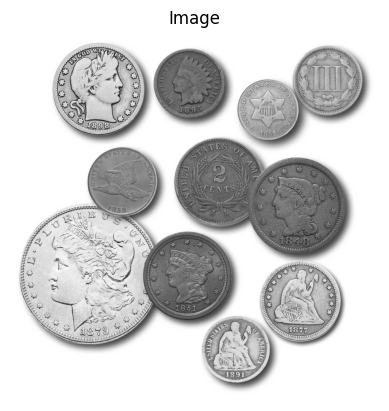

In [36]:
coins = cv2.imread('images/coins.jpg', 0)
show(coins)

## 侵蚀

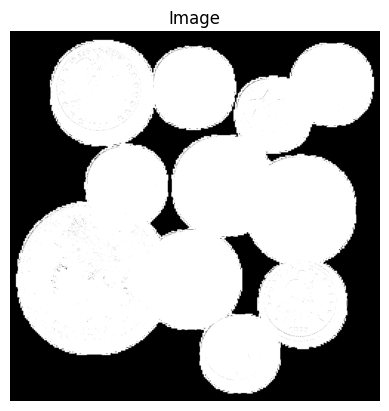

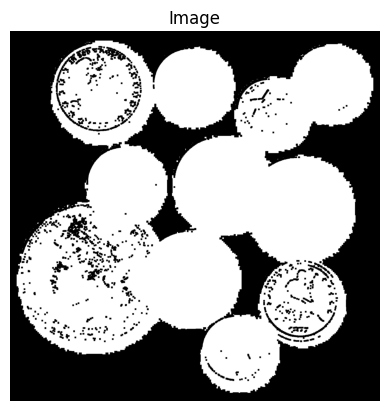

In [37]:
t, thresh = cv2.threshold(coins, 254, 255, cv2.THRESH_BINARY_INV)
show(thresh)
kernel = np.ones((9, 9), np.uint8)
erosion = cv2.erode(thresh, kernel, iterations=1)
show(erosion)

## 膨胀

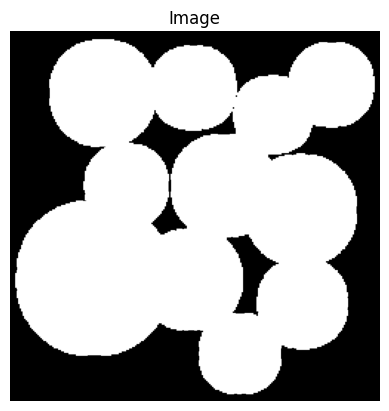

In [38]:
dilated = cv2.dilate(thresh, kernel, iterations=1)
show(dilated)

# 通用函数

腐蚀操作和膨胀操作是形态学运算的基础，将腐蚀和膨胀操作进行组合，就可以实现开运算、闭运算（关运算）、形态学梯度（Morphological Gradient）运算、礼帽运算（顶帽运算）、黑帽运算、击中击不中等多种不同形式的运算。

## 开运算

开运算进行的操作是先将图像腐蚀，再对腐蚀的结果进行膨胀。

开运算可以用于去噪、计数等。

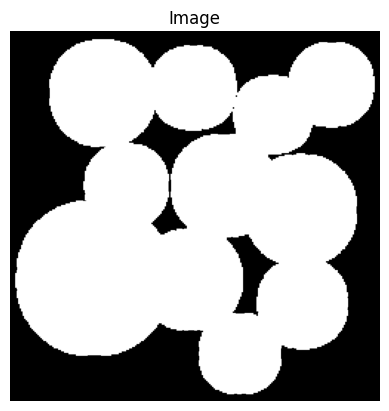

In [57]:
opening = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)
show(opening)

## 形态学梯度运算

形态学梯度运算是用图像的膨胀图像减腐蚀图像的操作，该操作可以获取原始图像中前景图像的边缘。

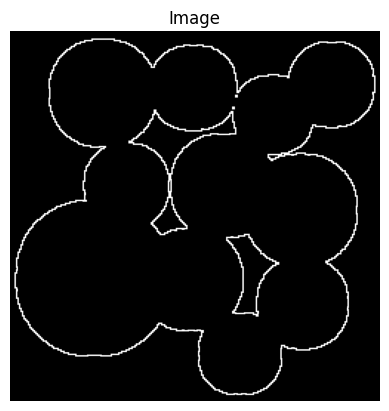

In [58]:
gradient = cv2.morphologyEx(dilated, cv2.MORPH_GRADIENT, kernel)
show(gradient)

## 礼帽运算
礼帽运算是用原始图像减去其开运算图像的操作。礼帽运算能够获取图像的噪声信息，或者得到比原始图像的边缘更亮的边缘信息。

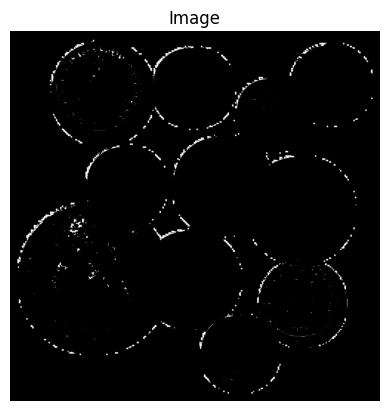

In [61]:
t, thresh = cv2.threshold(coins, 254, 255, cv2.THRESH_BINARY_INV)
tophat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel)
show(tophat)

## 黑帽运算

黑帽运算是用闭运算图像减去原始图像的操作。黑帽运算能够获取图像内部的小孔，或前景色中的小黑点，或者得到比原始图像的边缘更暗的边缘部分。

## 核函数

可以自定义核函数的形状。矩形，十字形，椭圆形。

In [62]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,  (5,5))
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,  (5,5))
print("kernel1=\n", kernel1)
print("kernel2=\n", kernel2)
print("kernel3=\n", kernel3)

kernel1=
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
kernel2=
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
kernel3=
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
